In [1]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset into a DataFrame and select 500 rows at random
df = pd.read_csv('dataset.csv', nrows=500)

# Drop irrelevant columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'mode'])

# Handle missing values: drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Convert 'danceability' to binary labels (0 for not danceable, 1 for danceable)
df_cleaned['danceability_binary'] = df_cleaned['danceability'].apply(lambda x: 1 if x > 0.7 else 0)

# Select relevant columns
######features = ['duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit']
features = ['energy', 'loudness', 'acousticness', 'valence']

In [3]:
X = df_cleaned[features].copy()
y = df_cleaned['danceability']


# Normalize and standardize columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Display cleaned DataFrame info
df_cleaned.head()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_binary
0,73,230666,False,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,55,149610,False,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,57,210826,False,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,71,201933,False,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,82,198853,False,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


In [4]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   popularity           474 non-null    int64  
 1   duration_ms          474 non-null    int64  
 2   explicit             474 non-null    bool   
 3   danceability         474 non-null    float64
 4   energy               474 non-null    float64
 5   key                  474 non-null    int64  
 6   loudness             474 non-null    float64
 7   speechiness          474 non-null    float64
 8   acousticness         474 non-null    float64
 9   instrumentalness     474 non-null    float64
 10  liveness             474 non-null    float64
 11  valence              474 non-null    float64
 12  tempo                474 non-null    float64
 13  time_signature       474 non-null    int64  
 14  track_genre          474 non-null    object 
 15  danceability_binary  474 non-null    int64  


In [5]:
# Review the X variable DataFrame
print(X.head(10))
print(X.info())
print(X.describe())
print(X.columns)

   energy  loudness  acousticness  valence
0  0.4610    -6.746        0.0322   0.7150
1  0.1660   -17.235        0.9240   0.2670
2  0.3590    -9.734        0.2100   0.1200
3  0.0596   -18.515        0.9050   0.1430
4  0.4430    -9.681        0.4690   0.1670
5  0.4810    -8.807        0.2890   0.6660
6  0.1470    -8.822        0.8570   0.0765
7  0.4440    -9.331        0.5590   0.7120
8  0.4140    -8.700        0.2940   0.6690
9  0.6320    -6.770        0.4260   0.1960
<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   energy        474 non-null    float64
 1   loudness      474 non-null    float64
 2   acousticness  474 non-null    float64
 3   valence       474 non-null    float64
dtypes: float64(4)
memory usage: 18.5 KB
None
           energy    loudness  acousticness     valence
count  474.000000  474.000000    474.000000  474.000000
mean     0.4

In [6]:
# Split the data into training and testing datasets by using

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    random_state=1)

Linear Regression

In [7]:
# Import the LinearRegression module from SKLearn
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
# Assign a random_state parameter of 1 to the model (not necessary, but for reproducibility)
lin_reg = LinearRegression(n_jobs=-1)  # n_jobs=-1 uses all available CPU cores

# Fit the model using training data
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
# Make a prediction using the testing data
y_predict = lin_reg.predict(X_test)

In [9]:
###### features = ['duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit']

In [10]:
# Compute metrics for the linear regression model:  r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is -0.027104554005946246.
The mean squared error is 0.012563782400345199.
The root mean squared error is 0.11208827949587413.
The standard deviation is 0.11615519421958642.


Logistic Regression Model


In [11]:
# Import the LogisticRegression module from SKLearn
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_cleaned['danceability_binary'], test_size=0.2, random_state=42)

# Create a logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)
logreg_def = accuracy


Accuracy: 0.8736842105263158


In [12]:
#OPTIMIZE LOGISTIC REGRESSION MODEL 
param_grid = {
    
    # Logistic Regression hyperparameters
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['saga', 'liblinear', 'lbfgs', 'newton-cg'],
    'class_weight': [None, 'balanced'],  # Handles class imbalance
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

In [13]:
#fit the model with the best hyperparameters
log_reg2 = LogisticRegression()
gridsearch = GridSearchCV(estimator = log_reg2, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['saga', 'liblinear', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [14]:
#print the best parameters
print(gridsearch.best_params_)

{'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}


In [15]:
#find the best model
best_model = gridsearch.best_estimator_
logreg_gridcv_best_model=best_model

In [16]:
test_score= best_model.score(X_test, y_test)
print (test_score)
logreg_gridsearchcv = test_score

0.8736842105263158


In [17]:
#RANDOMIZED SEARCHCV
param_distributions = {
    
    # Logistic Regression hyperparameters
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['saga', 'liblinear', 'lbfgs', 'newton-cg', 'elasticnet'],
    'l1_ratio': np.linspace(0, 1, 10),  # Used only if penalty is 'elasticnet']
    'class_weight': [None, 'balanced'],  # Handles class imbalance
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

In [18]:
##fit the model with the best hyperparameters
log_reg3 = LogisticRegression()
random_search = RandomizedSearchCV(estimator=log_reg3, param_distributions=param_distributions, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.4...9e+03, 1.00000000e+04]),
                                        'class_weight': [None, 'balanced'],
                                        'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['saga', 'liblinear', 'lbfgs',
                                                   'newton-cg', 'elasticnet'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=42, scoring='accuracy')

In [19]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy with Best Parameters:", test_accuracy)
logreg_random_searchcv= test_accuracy

Test Set Accuracy with Best Parameters: 0.12631578947368421


Random Forest Model

In [20]:
# Import the RandomForestClassifier module from SKLearn
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_cleaned['danceability_binary'], test_size=0.2, random_state=42)

# Create a random forest classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)
rfc_def = accuracy

Accuracy: 0.8421052631578947


In [21]:
#import the GridSearchCV to optimize the random tree model
from sklearn.model_selection import GridSearchCV

#create the parameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}




In [22]:
#create a random forest classifier
rf = RandomForestClassifier()

In [23]:
gridsearch = GridSearchCV(estimator=rf, param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs = -1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [24]:
#print the best parameters
print(gridsearch.best_params_)

{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [25]:
#find the best model
best_model = gridsearch.best_estimator_

In [26]:
#
test_score= best_model.score(X_test, y_test)
print (test_score)
rfc_grid_searchcv = test_score

0.8315789473684211


In [27]:
#USING RANDOMIZED SEARCH CV TO OPTIMIZE THE FOREST TREE MODEL
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of trees in the forest
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Class weights
}


In [28]:
# Create a RandomForestClassifier
rf2 = RandomForestClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf2, param_distributions=param_distributions, n_iter=30, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   random_state=42, scoring='accuracy')

In [29]:
# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy with Best Parameters:", test_accuracy)
rfc_random_searchcv = test_accuracy

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 50, 'class_weight': None, 'bootstrap': True}
Test Set Accuracy with Best Parameters: 0.8736842105263158


In [30]:
#the logistics regression with the GridSearchCV resulted in the most accuracy
#it improved marginally, but still increased in accuracy

#print models of all the accuracy models

In [31]:
#Create y-Feature variable
y_variable = df_cleaned[['danceability_binary']].to_numpy().ravel()
y_variable[0:5]

array([0, 0, 0, 0, 0])

In [32]:
#print the best parameters
print(gridsearch.best_params_)

{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [33]:
#Create X-Feature list "Variables", scale the data
X_variables = df_cleaned[['energy', 'loudness', 'valence', 'tempo']]

X_scaled = StandardScaler().fit_transform(X_variables)
#Create the X-Variable DataFrame
df_X_scaled = pd.DataFrame(
    X_scaled,
    columns=['energy', 'loudness', 'valence', 'tempo']
)
df_X_scaled.head()

,energy,loudness,valence,tempo
0,0.200780,0.822196,1.600567,-1.038877
1,-1.082293,-1.973491,-0.570514,-1.395372
2,-0.242859,0.025789,-1.282900,-1.434926
3,-1.545068,-2.314656,-1.171439,2.168592
4,0.122491,0.039915,-1.055131,0.056181


In [34]:
#Create dummy variables for the 'track_genre"
df_dummies = pd.get_dummies(df_cleaned, columns=['track_genre'])
df_dropped = df_dummies.drop(columns=[
    'duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
    'explicit', 'danceability', 'key', 'time_signature', 'danceability_binary'
])
df_int = df_dropped.astype(int)
#review DataFrame
df_int.head()

,track_genre_acoustic
0,1
1,1
2,1
3,1
4,1


In [35]:
#Split the data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_variable, random_state=42)


In [36]:
#Create a LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [37]:
#fit the model
model.fit(X_train, y_train)

LinearRegression()

In [38]:
#Make Predictions
predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is 0.03217074533000608.
The mean squared error is 0.10661772736990256.
The root mean squared error is 0.32652370108447343.
The standard deviation is 0.11615519421958642.


In [40]:
#Create a LOGISTITIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
classifier_2 = LogisticRegression(random_state=42)
classifier_2

LogisticRegression(random_state=42)

In [41]:
#fit the model
classifier_2.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [42]:
#make predictions
predictions_2 = classifier_2.predict(X_test)

In [43]:
#MODEL EVALUATION
# Calculating the confusion matrix
cm_2 = confusion_matrix(y_test, predictions_2)
cm_df_2 = pd.DataFrame(
    cm_2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_2 = accuracy_score(y_test, predictions_2)

# Displaying results
print("Confusion Matrix")
display(cm_df_2)
print(f"Accuracy Score : {acc_score_2}")
print("Classification Report")
print(classification_report(y_test, predictions_2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,104,0
Actual 1,15,0


Accuracy Score : 0.8739495798319328
Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       104
           1       0.00      0.00      0.00        15

    accuracy                           0.87       119
   macro avg       0.44      0.50      0.47       119
weighted avg       0.76      0.87      0.82       119



In [44]:
#Create a RANDOM FORREST MODEL
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model

RandomForestClassifier(random_state=42)

In [45]:
#Fit Model
rf_model = rf_model.fit(X_train, y_train)

In [46]:
#Make predictions
predictions_3 = rf_model.predict(X_test)

In [53]:
#MODEL EVALUATION
# Calculating the confusion matrix
cm_3 = confusion_matrix(y_test, predictions_3)
cm_df_3 = pd.DataFrame(
    cm_3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_3 = accuracy_score(y_test, predictions_3)

# Displaying results
print("Confusion Matrix")
display(cm_df_3)
print(f"Accuracy Score : {acc_score_3}")
print("Classification Report")
print(classification_report(y_test, predictions_3))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,103,1
Actual 1,15,0


Accuracy Score : 0.865546218487395
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       104
           1       0.00      0.00      0.00        15

    accuracy                           0.87       119
   macro avg       0.44      0.50      0.46       119
weighted avg       0.76      0.87      0.81       119



In [48]:
#CONFUSION MATRIX FOR BEST MODEL (logistic regression using gridsearch)
y_pred = logreg_gridcv_best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#TopLeft are danceable, identified as danceable
#TopRight are not danceable, we identified as danceable
#BottomLeft are danceable, we identified them as not danceable
#BottomRight: songs that are not danceable, that we don't identify as danceable

[[104   0]
 [ 15   0]]


In [49]:
#ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.50


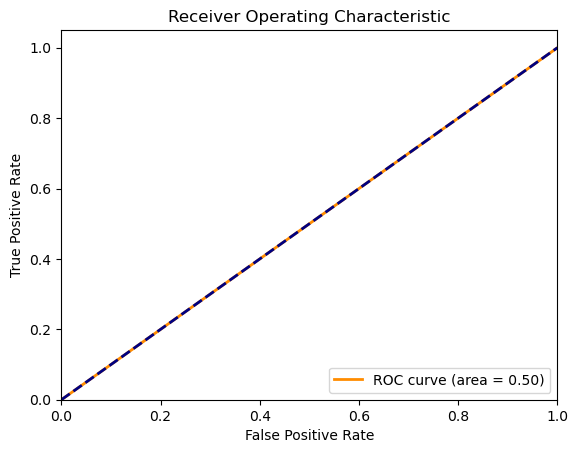

In [50]:
#plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [51]:
#MODERATE MODEL PERFORMANCE
#there is a 50% chance that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.
#This is better than random guessing (which would have an AUC of 0.5) but not particularly strong.

In [52]:
print('logistic regression model:', logreg_def)
print('logistic regression model with GridSearchCV:',logreg_gridsearchcv)
print('logistic regression model with RandomSearchCV:',logreg_random_searchcv)
print('random forest model:',rfc_def)
print('random forest model with RandomSearchCV:',rfc_grid_searchcv)
print('random forest model with RandomSearchCV:',rfc_random_searchcv)

logistic regression model: 0.8736842105263158
logistic regression model with GridSearchCV: 0.8736842105263158
logistic regression model with RandomSearchCV: 0.12631578947368421
random forest model: 0.8421052631578947
random forest model with RandomSearchCV: 0.8315789473684211
random forest model with RandomSearchCV: 0.8736842105263158


In [56]:
#VISUALIZATIONS - NICOLE

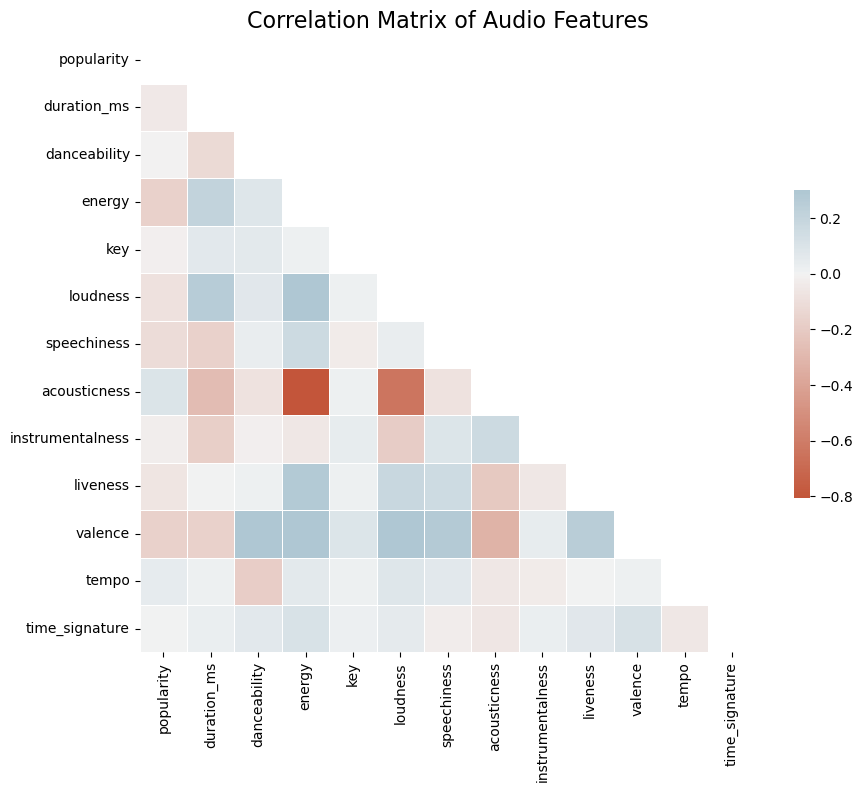

In [64]:
# 1. Talk about how we first looked at if there were any correlations between the features and danceability using a correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned_dropped is already created after dropping the specified columns

# Calculate the correlation matrix
corr = df_cleaned_dropped.corr()

# This helps us only plot half the square, because it's symmetrical
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define a nice set of colors
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Create the heatmap and name the visualization
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                      square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title to the heatmap
plt.title('Correlation Matrix of Audio Features', fontsize=16)

# Display the plot
plt.show()

In [63]:
# Correlation of danceability with other variables
danceability_corr = corr['danceability'].sort_values(ascending=False)
print(danceability_corr)

danceability        1.000000
valence             0.322970
energy              0.087913
loudness            0.074035
time_signature      0.064006
key                 0.053994
speechiness         0.033425
liveness            0.016715
popularity         -0.006387
instrumentalness   -0.017718
acousticness       -0.084684
duration_ms        -0.124152
tempo              -0.185163
Name: danceability, dtype: float64


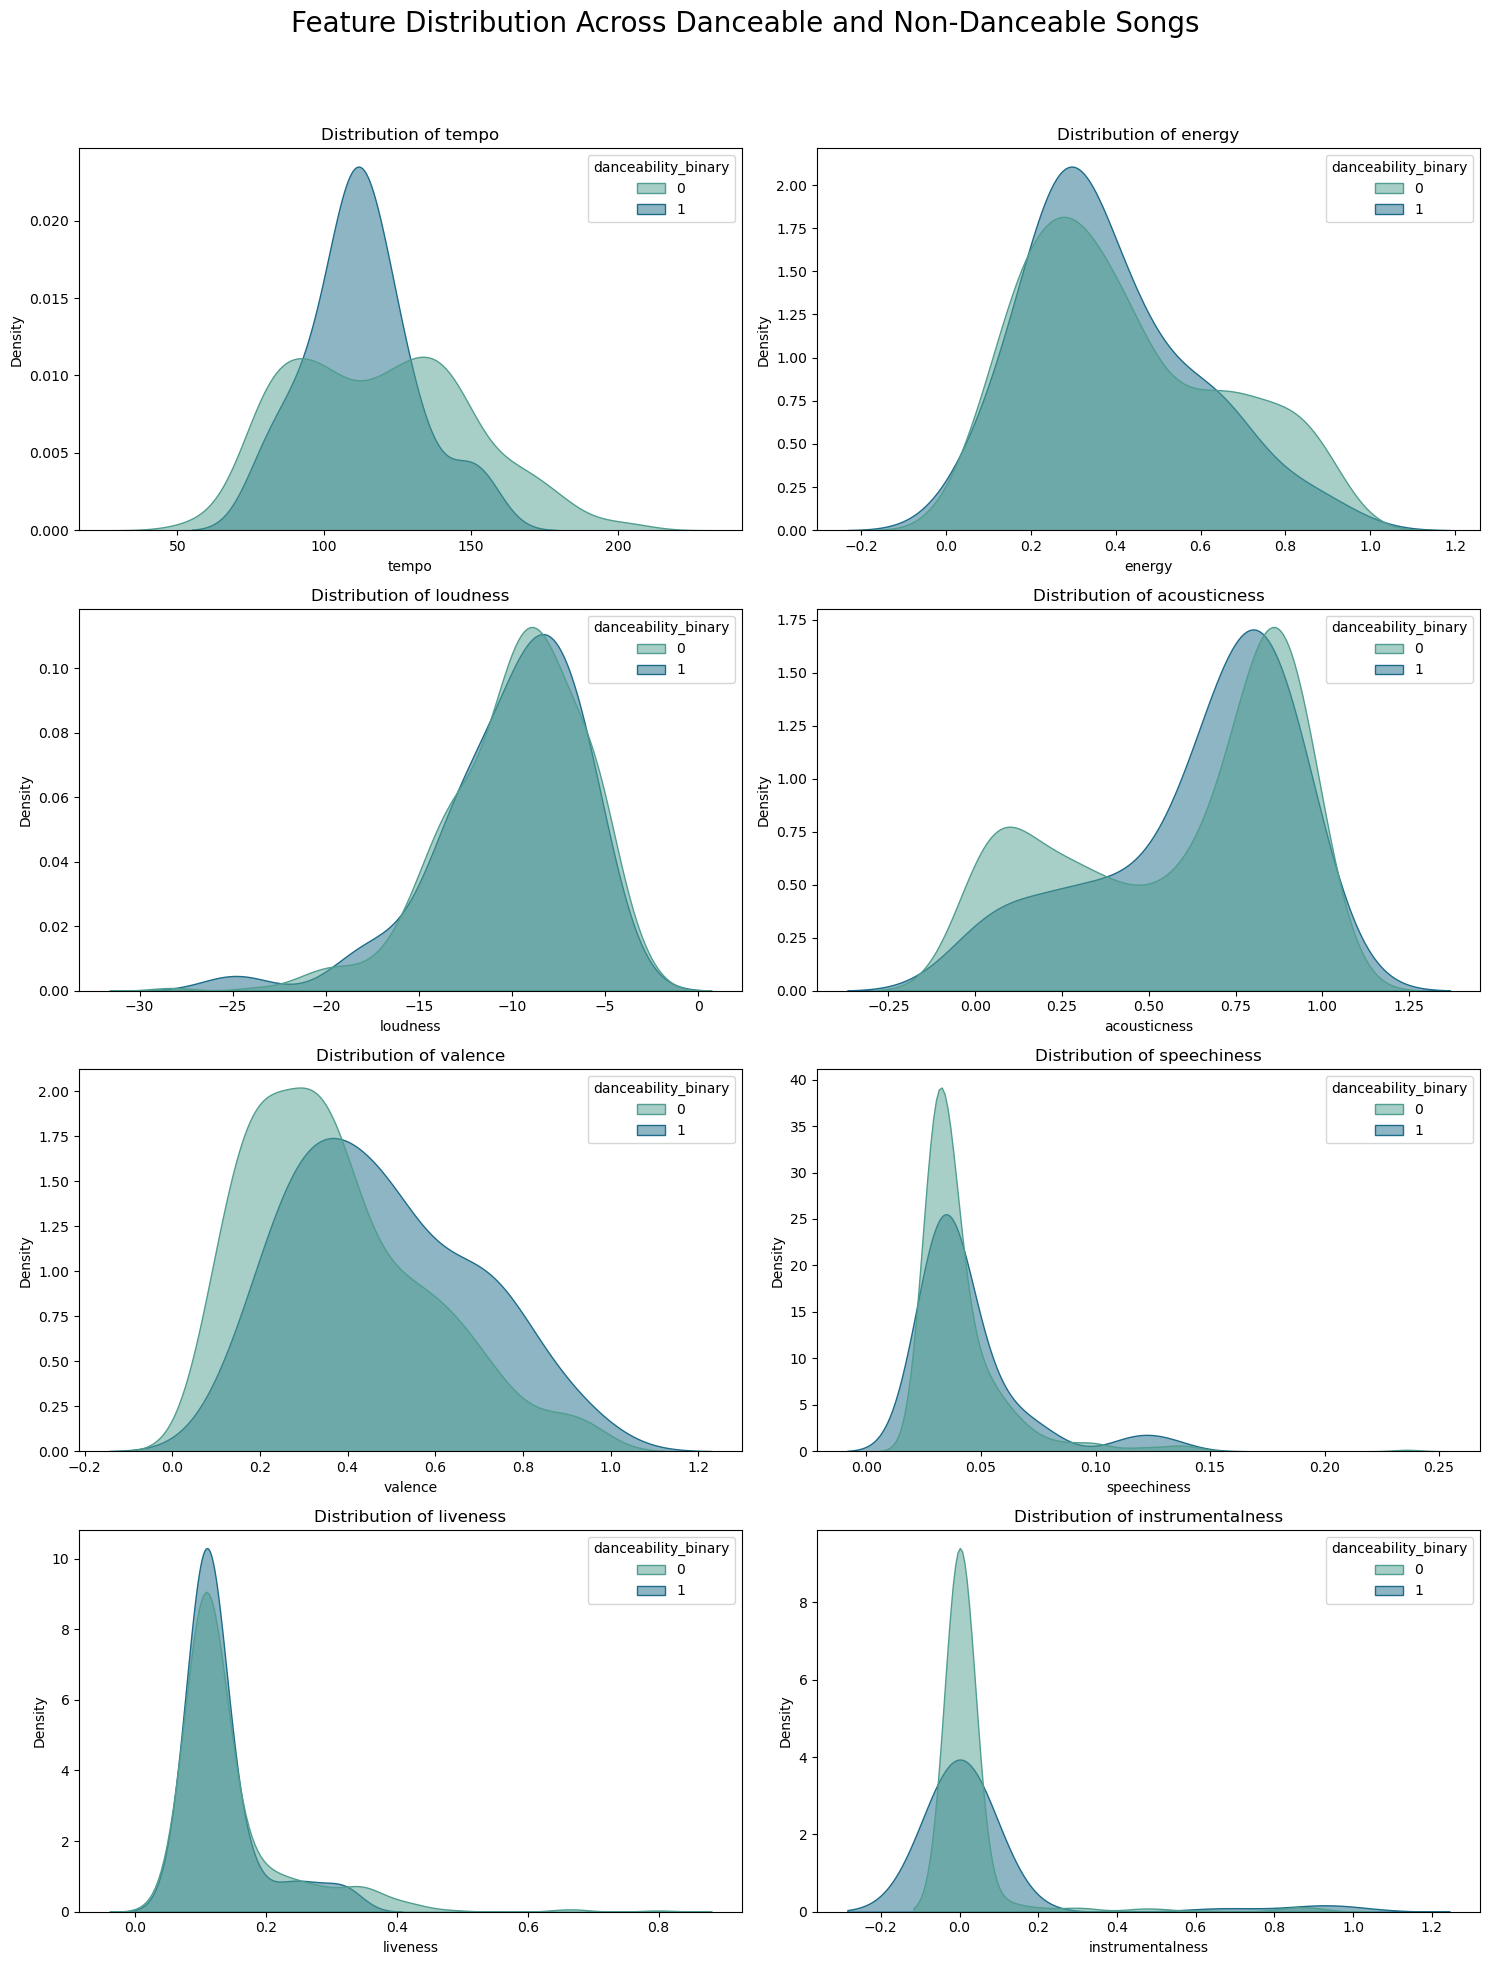

In [70]:
# 2. Visualize the distribution of features across danceable and non-danceable songs. (kernel density estimation (KDE) plots)

import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['tempo', 'energy', 'loudness', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness']

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))
plt.suptitle('Feature Distribution Across Danceable and Non-Danceable Songs', fontsize=20)

# Loop through the features and create a subplot for each
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=df_cleaned, x=feature, hue='danceability_binary', fill=True, common_norm=False, palette='crest', alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
